In [63]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

1. Predicting temperature
In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. The dataset you'll use is a Postgres database version of this dataset from Kaggle. To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

First, load the dataset from the weatherinszeged table from Thinkful's database.

In [64]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select* from weatherinszeged', con = engine)


engine.dispose()

In [65]:
df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   date                 96453 non-null  datetime64[ns, UTC]
 1   summary              96453 non-null  object             
 2   preciptype           96453 non-null  object             
 3   temperature          96453 non-null  float64            
 4   apparenttemperature  96453 non-null  float64            
 5   humidity             96453 non-null  float64            
 6   windspeed            96453 non-null  float64            
 7   windbearing          96453 non-null  float64            
 8   visibility           96453 non-null  float64            
 9   loudcover            96453 non-null  float64            
 10  pressure             96453 non-null  float64            
 11  dailysummary         96453 non-null  object             
dtypes: datetime64[ns, 

Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.

In [89]:
X = df[['windspeed', 'windbearing', 'humidity', 'pressure']]
y = df['temperature']
import statsmodels.api as sm

from statsmodels.tools.tools import add_constant
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Tue, 26 May 2020   Prob (F-statistic):               0.00
Time:                        16:04:53   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      

Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

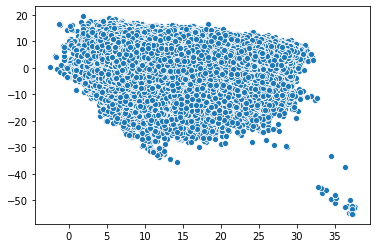

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

# lrm = LinearRegression()
# fits = lrm.fit(X,y)
predictions = results.predict(X)

residuals = y-predictions
# plt.plot(residuals)
# plt.plot(predictions)
import seaborn as sns
sns.scatterplot(predictions,residuals)


In [91]:

pd.Series([variance_inflation_factor(X.values, i)
   for i in range(X.shape[1])], index = X.columns)



const          99.132308
windspeed       1.067930
windbearing     1.011563
humidity        1.053985
pressure        1.002508
dtype: float64

In [92]:
from sklearn.preprocessing import StandardScaler

residualscaled = StandardScaler().fit_transform(residuals.values.reshape(-1,1))

<function matplotlib.pyplot.show(*args, **kw)>

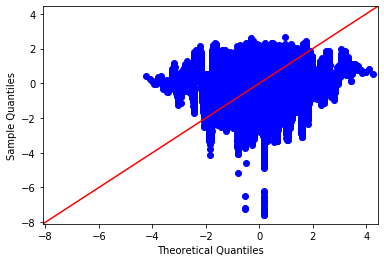

In [93]:
import statsmodels.api as sm
import pylab
sm.qqplot(residualscaled, line= '45')
pylab.show


2. House prices

Load the houseprices data from Thinkful's database.

In [72]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df1 = pd.read_sql_query('select* from houseprices', con = engine)

engine.dispose()

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: House Prices

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

Load the dataset from the Thinkful PostgreSQL database. You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:

In [73]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Please follow the example above and call engine.dispose() when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.
Investigate the data, and do any necessary data cleaning.
Explore the data and find some variables that you think would be useful in predicting house prices.
Build your initial model using these features and estimate the parameters using OLS.
Spend up to 4 hours on this assignment. You will submit the notebook after the assessment questions.

In [74]:
df1.overallcond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: overallcond, dtype: int64

(array([445., 726., 154.,   0.,  14.,  37.,   0.,  65.,  11.,   8.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

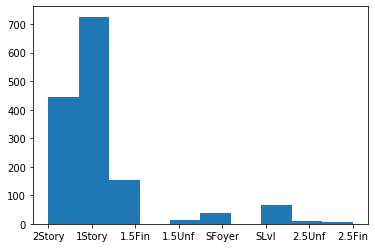

In [75]:
plt.hist(df1.housestyle)

In [76]:

np.abs(df1.corr().loc[:,"saleprice"]).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
id               0.021917
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: salepr

In [87]:
# Set features and variables
X1 = pd.concat([df1[['overallcond', 'grlivarea', 'garagecars']], pd.get_dummies(df1['roofmatl'], prefix = 'roofmatl', drop_first = True)], axis = 1)
y1 = df1['saleprice']


In [88]:
# Find the OLS
import statsmodels.api as sm
X1 = sm.add_constant(X1)

results = sm.OLS(y1, X1).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     266.4
Date:                Tue, 26 May 2020   Prob (F-statistic):          1.22e-319
Time:                        16:04:26   Log-Likelihood:                -17783.
No. Observations:                1460   AIC:                         3.559e+04
Df Residuals:                    1449   BIC:                         3.565e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.019e+05   4.98e+04     -8.069      0.000      -5e+05   -3.04e+05
overallcond       2444.1382   1135.139      2.153      0.031     217.447    4670.829
grlivarea           82.8402      2.771     29.901      0.000      77.406      88.275
garagecars        4.113e+04   1914.445     21.485      0.000    3.74e+04    4.49e+04
roofmatl_CompShg  3.709e+05   4.87e+04      7.622      0.000    2.75e+05    4.66e+05
roofmatl_Membran  4.311e+05    6.8e+04      6.339      0.000    2.98e+05    5.64e+05
roofmatl_Metal    4.055e+05   6.81e+04      5.951      0.000    2.72e+05    5.39e+05
roofmatl_Roll     2.853e+05   6.77e+04      4.214      0.000    1.53e+05    4.18e+05
roofmatl_Tar&Grv  3.649e+05   5.05e+04      7.219      0.000    2.66e+05    4.64e+05
roofmatl_WdShake  3.623e+05   5.27e+04      6.874      0.000    2.59e+05    4.66e+05
roofmatl_WdShngl  4.655e+05   5.19e+04      8.965      0.000    3.64e+05    5.67e+05
==============================================================================
Omnibus:                      307.148   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2410.658
Skew:                           0.755   Prob(JB):                         0.00
Kurtosis:                       9.111   Cond. No.                     1.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Reimplement the model you built in the previous checkpoint.
Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
be sure to close the database connection after initially pulling in your data.
